# Load the dataset

In [281]:
import pandas as pd
# Remove the limit on the number of columns displayed
pd.set_option('display.max_columns', None)

In [282]:
fact_table = pd.read_csv("fact_table.csv")

In [283]:
fact_table['team1_points'].unique()

array([ 3.,  0.,  1., nan])

In [284]:
# Re-import necessary libraries due to reset
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding
fact_table['time_period_encoded'] = label_encoder.fit_transform(fact_table['Match_Time_Category'])

# Display the results
fact_table, dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


(     Unnamed: 0.1  Match ID             Team 1          Team 2  Team 1 Score  \
 0               0    497410     Manchester Utd          Fulham           1.0   
 1               1    497411       Ipswich Town       Liverpool           0.0   
 2               2    497412            Arsenal          Wolves           2.0   
 3               3    497413            Everton        Brighton           0.0   
 4               4    497414      Newcastle Utd     Southampton           1.0   
 ..            ...       ...                ...             ...           ...   
 154           154    497567  Nottingham Forest     Aston Villa           NaN   
 155           155    497562           Brighton  Crystal Palace           NaN   
 156           156    497565    Manchester City  Manchester Utd           NaN   
 157           157    497563            Chelsea       Brentford           NaN   
 158           158    497568        Southampton       Tottenham           NaN   
 
      Team 2 Score     Win

In [285]:
dataset = fact_table[['Team 1 Score', 'Team 2 Score','Prev Team 1 Form','Prev Team 2 Form','Prev Team 2 Goal Difference',
'Prev Team 2 Points','Prev Team 2 Form','Cumulative_Avg_HST','Cumulative_Avg_AST','Cumulative_Avg_HF',	'Cumulative_Avg_AF',	
'Cumulative_Avg_HC', 'Cumulative_Avg_AC', 'Cumulative_Avg_HY', 'team_1_fdr','team_2_fdr', 'Cumulative_Avg_AY',	
'Cumulative_Avg_HR', 'Cumulative_Avg_AR',
'H2H_Home_Total_Wins_Last_4', 'H2H_Away_Total_Wins_Last_4', 'H2H_Draws_Last_4',
 'Cum PPDA Team 2', 'Avg PPDA Team 1', 'Avg PPDA Team 2', 
'Avg Deep Completions Team 1', 'Avg Deep Completions Team 2', 'Weighted Avg PPDA Team 1', 
'Weighted Avg PPDA Team 2', 'Weighted Avg Deep Completions Team 1', 'Weighted Avg Deep Completions Team 2', 
'Avg xG', 'Weighted Avg xG', 'Avg xG.1', 'Weighted Avg xG.1', 'Avg xG Team 1', 'Avg xG Team 2',
'Weighted Avg xG Team 1', 'Weighted Avg xG Team 2', 'Cum np_xg', 'Avg team1_np_xg', 'Avg team2_np_xg', 
'Weighted Avg team1_np_xg', 'Weighted Avg team2_np_xg', 'Avg team1_expected_points', 
'Avg team2_expected_points', 'Weighted Avg team1_expected_points', 'Weighted Avg team2_expected_points',
'Avg Team 1 Won', 'Avg Team 2 Won', 'Avg Team 1 Drawn', 'Avg Team 2 Drawn', 'Avg Team 1 Lost', 'Avg Team 2 Lost',
'Avg Team 1 Goals Scored', 'Avg Team 2 Goals Scored', 'Avg Team 1 Goals Conceded', 'Avg Team 2 Goals Conceded', 
'Avg Team 1 Goal Difference','Avg Team 2 Goal Difference', 'time_period_encoded', 'ppg_team1', 'ppg_team2',
                      'team1_player_average','team2_player_average']]

In [286]:
prediction_dataset = fact_table[['Team 1', 'Team 2'] + list(dataset.columns)].tail(10)

In [287]:
prediction_dataset.tail(10)

,Team 1,Team 2,Team 1 Score,Team 2 Score,Prev Team 1 Form,Prev Team 2 Form,Prev Team 2 Goal Difference,Prev Team 2 Points,Prev Team 2 Form,Cumulative_Avg_HST,Cumulative_Avg_AST,Cumulative_Avg_HF,Cumulative_Avg_AF,Cumulative_Avg_HC,Cumulative_Avg_AC,Cumulative_Avg_HY,team_1_fdr,team_2_fdr,Cumulative_Avg_AY,Cumulative_Avg_HR,Cumulative_Avg_AR,H2H_Home_Total_Wins_Last_4,H2H_Away_Total_Wins_Last_4,H2H_Draws_Last_4,Cum PPDA Team 2,Avg PPDA Team 1,Avg PPDA Team 2,Avg Deep Completions Team 1,Avg Deep Completions Team 2,Weighted Avg PPDA Team 1,Weighted Avg PPDA Team 2,Weighted Avg Deep Completions Team 1,Weighted Avg Deep Completions Team 2,Avg xG,Weighted Avg xG,Avg xG.1,Weighted Avg xG.1,Avg xG Team 1,Avg xG Team 2,Weighted Avg xG Team 1,Weighted Avg xG Team 2,Cum np_xg,Avg team1_np_xg,Avg team2_np_xg,Weighted Avg team1_np_xg,Weighted Avg team2_np_xg,Avg team1_expected_points,Avg team2_expected_points,Weighted Avg team1_expected_points,Weighted Avg team2_expected_points,Avg Team 1 Won,Avg Team 2 Won,Avg Team 1 Drawn,Avg Team 2 Drawn,Avg Team 1 Lost,Avg Team 2 Lost,Avg Team 1 Goals Scored,Avg Team 2 Goals Scored,Avg Team 1 Goals Conceded,Avg Team 2 Goals Conceded,Avg Team 1 Goal Difference,Avg Team 2 Goal Difference,time_period_encoded,ppg_team1,ppg_team2,team1_player_average,team2_player_average
149,Everton,Liverpool,NaN,NaN,1.0,2.6,18,35,2.6,5.571429,4.285714,10.714286,11.928571,4.285714,6.428571,2.357143,NaN,NaN,2.785714,0.000000,0.000000,NaN,NaN,NaN,140.423439,14.898122,10.030246,6.214286,10.071429,36.181153,29.374291,15.091837,29.494898,1.064286,NaN,2.028571,NaN,1.220984,2.409830,NaN,NaN,47.786723,1.220984,2.192353,NaN,NaN,1.097971,2.235021,NaN,NaN,1.214286,6.214286,2.214286,0.500000,4.071429,0.785714,7.000000,14.714286,14.357143,3.785714,-7.357143,10.928571,0,1.000000,2.500000,0.000000,0.000000
150,Arsenal,Everton,NaN,NaN,2.2,1.0,-7,14,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.182590,NaN,9.266667,NaN,29.384288,NaN,29.653333,NaN,1.706667,5.333333,0.993333,NaN,2.195366,NaN,6.860519,NaN,48.501936,2.093877,1.139586,6.543365,NaN,1.929520,1.024773,6.029750,NaN,4.600000,1.333333,2.466667,2.400000,0.933333,4.200000,14.866667,7.466667,7.466667,14.800000,7.400000,-7.333333,0,1.933333,1.000000,10.997956,5.174126
151,Liverpool,Fulham,NaN,NaN,2.6,1.6,2,23,1.6,5.000000,3.866667,10.066667,11.600000,5.733333,5.200000,2.266667,2.0,5.0,1.733333,0.133333,0.133333,NaN,NaN,NaN,176.985350,NaN,11.799023,NaN,5.866667,NaN,32.250664,NaN,16.035556,1.893333,NaN,1.373333,3.948333,NaN,1.651905,NaN,4.749228,53.949182,2.046196,1.550416,NaN,4.457446,2.086020,1.675547,NaN,4.817197,6.533333,3.200000,0.600000,2.400000,0.800000,2.400000,15.666667,11.000000,4.266667,10.066667,11.400000,0.933333,0,2.500000,1.533333,10.174799,5.263219
152,Newcastle Utd,Leicester City,NaN,NaN,1.0,0.8,-9,14,0.8,4.333333,5.133333,11.400000,11.066667,4.933333,5.666667,2.400000,2.0,4.0,2.266667,0.133333,0.000000,NaN,NaN,NaN,195.632016,10.835365,13.042134,7.533333,4.933333,33.228452,36.517976,23.102222,13.813333,1.433333,4.300000,1.080000,3.105000,1.402115,1.293649,4.206345,3.719242,37.391796,1.300626,1.192161,3.901877,3.427462,1.234353,0.841720,3.703060,2.419945,3.400000,1.266667,2.533333,3.000000,2.066667,3.733333,9.266667,10.533333,8.666667,15.066667,0.600000,-4.533333,0,1.333333,0.933333,11.365882,6.955506
153,Wolves,Ipswich Town,NaN,NaN,1.2,0.8,-13,9,0.8,4.933333,4.000000,10.600000,13.400000,6.266667,5.666667,2.000000,2.0,2.0,2.200000,0.066667,0.066667,NaN,NaN,NaN,200.574321,12.566591,13.371621,5.200000,4.333333,39.375318,37.440540,16.293333,12.133333,1.020000,3.123750,0.940000,2.585000,1.088662,1.184411,3.334027,3.257131,34.096099,1.088662,1.184411,3.334027,3.257131,0.915980,0.724433,2.805189,1.992192,0.600000,0.333333,1.733333,3.733333,5.666667,3.933333,11.200000,7.266667,21.133333,15.466667,-9.933333,-8.200000,0,0.600000,0.600000,11.508869,10.624012
154,Nottingham Forest,Aston Villa,NaN,NaN,1.2,1.4,0,25,1.4,5.200000,3.133333,12.466667,13.400000,6.533333

In [288]:
prediction_dataset.to_csv("prediction_data.csv")

In [289]:
prediction_dataset.columns

Index(['Team 1', 'Team 2', 'Team 1 Score', 'Team 2 Score', 'Prev Team 1 Form',
       'Prev Team 2 Form', 'Prev Team 2 Goal Difference', 'Prev Team 2 Points',
       'Prev Team 2 Form', 'Cumulative_Avg_HST', 'Cumulative_Avg_AST',
       'Cumulative_Avg_HF', 'Cumulative_Avg_AF', 'Cumulative_Avg_HC',
       'Cumulative_Avg_AC', 'Cumulative_Avg_HY', 'team_1_fdr', 'team_2_fdr',
       'Cumulative_Avg_AY', 'Cumulative_Avg_HR', 'Cumulative_Avg_AR',
       'H2H_Home_Total_Wins_Last_4', 'H2H_Away_Total_Wins_Last_4',
       'H2H_Draws_Last_4', 'Cum PPDA Team 2', 'Avg PPDA Team 1',
       'Avg PPDA Team 2', 'Avg Deep Completions Team 1',
       'Avg Deep Completions Team 2', 'Weighted Avg PPDA Team 1',
       'Weighted Avg PPDA Team 2', 'Weighted Avg Deep Completions Team 1',
       'Weighted Avg Deep Completions Team 2', 'Avg xG', 'Weighted Avg xG',
       'Avg xG.1', 'Weighted Avg xG.1', 'Avg xG Team 1', 'Avg xG Team 2',
       'Weighted Avg xG Team 1', 'Weighted Avg xG Team 2', 'Cum np_xg',
 

In [290]:
dataset = dataset.iloc[10:-10]
df = dataset

In [291]:
# df['time_period_encoded']

In [292]:
df.columns

Index(['Team 1 Score', 'Team 2 Score', 'Prev Team 1 Form', 'Prev Team 2 Form',
       'Prev Team 2 Goal Difference', 'Prev Team 2 Points', 'Prev Team 2 Form',
       'Cumulative_Avg_HST', 'Cumulative_Avg_AST', 'Cumulative_Avg_HF',
       'Cumulative_Avg_AF', 'Cumulative_Avg_HC', 'Cumulative_Avg_AC',
       'Cumulative_Avg_HY', 'team_1_fdr', 'team_2_fdr', 'Cumulative_Avg_AY',
       'Cumulative_Avg_HR', 'Cumulative_Avg_AR', 'H2H_Home_Total_Wins_Last_4',
       'H2H_Away_Total_Wins_Last_4', 'H2H_Draws_Last_4', 'Cum PPDA Team 2',
       'Avg PPDA Team 1', 'Avg PPDA Team 2', 'Avg Deep Completions Team 1',
       'Avg Deep Completions Team 2', 'Weighted Avg PPDA Team 1',
       'Weighted Avg PPDA Team 2', 'Weighted Avg Deep Completions Team 1',
       'Weighted Avg Deep Completions Team 2', 'Avg xG', 'Weighted Avg xG',
       'Avg xG.1', 'Weighted Avg xG.1', 'Avg xG Team 1', 'Avg xG Team 2',
       'Weighted Avg xG Team 1', 'Weighted Avg xG Team 2', 'Cum np_xg',
       'Avg team1_np_xg', 'A

In [293]:
df.to_csv("modelling_table.csv")

In [294]:
df.columns

Index(['Team 1 Score', 'Team 2 Score', 'Prev Team 1 Form', 'Prev Team 2 Form',
       'Prev Team 2 Goal Difference', 'Prev Team 2 Points', 'Prev Team 2 Form',
       'Cumulative_Avg_HST', 'Cumulative_Avg_AST', 'Cumulative_Avg_HF',
       'Cumulative_Avg_AF', 'Cumulative_Avg_HC', 'Cumulative_Avg_AC',
       'Cumulative_Avg_HY', 'team_1_fdr', 'team_2_fdr', 'Cumulative_Avg_AY',
       'Cumulative_Avg_HR', 'Cumulative_Avg_AR', 'H2H_Home_Total_Wins_Last_4',
       'H2H_Away_Total_Wins_Last_4', 'H2H_Draws_Last_4', 'Cum PPDA Team 2',
       'Avg PPDA Team 1', 'Avg PPDA Team 2', 'Avg Deep Completions Team 1',
       'Avg Deep Completions Team 2', 'Weighted Avg PPDA Team 1',
       'Weighted Avg PPDA Team 2', 'Weighted Avg Deep Completions Team 1',
       'Weighted Avg Deep Completions Team 2', 'Avg xG', 'Weighted Avg xG',
       'Avg xG.1', 'Weighted Avg xG.1', 'Avg xG Team 1', 'Avg xG Team 2',
       'Weighted Avg xG Team 1', 'Weighted Avg xG Team 2', 'Cum np_xg',
       'Avg team1_np_xg', 'A

In [295]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# # Clean the data if necessary
# data = data.iloc[10:]  # Remove initial rows if they're not needed

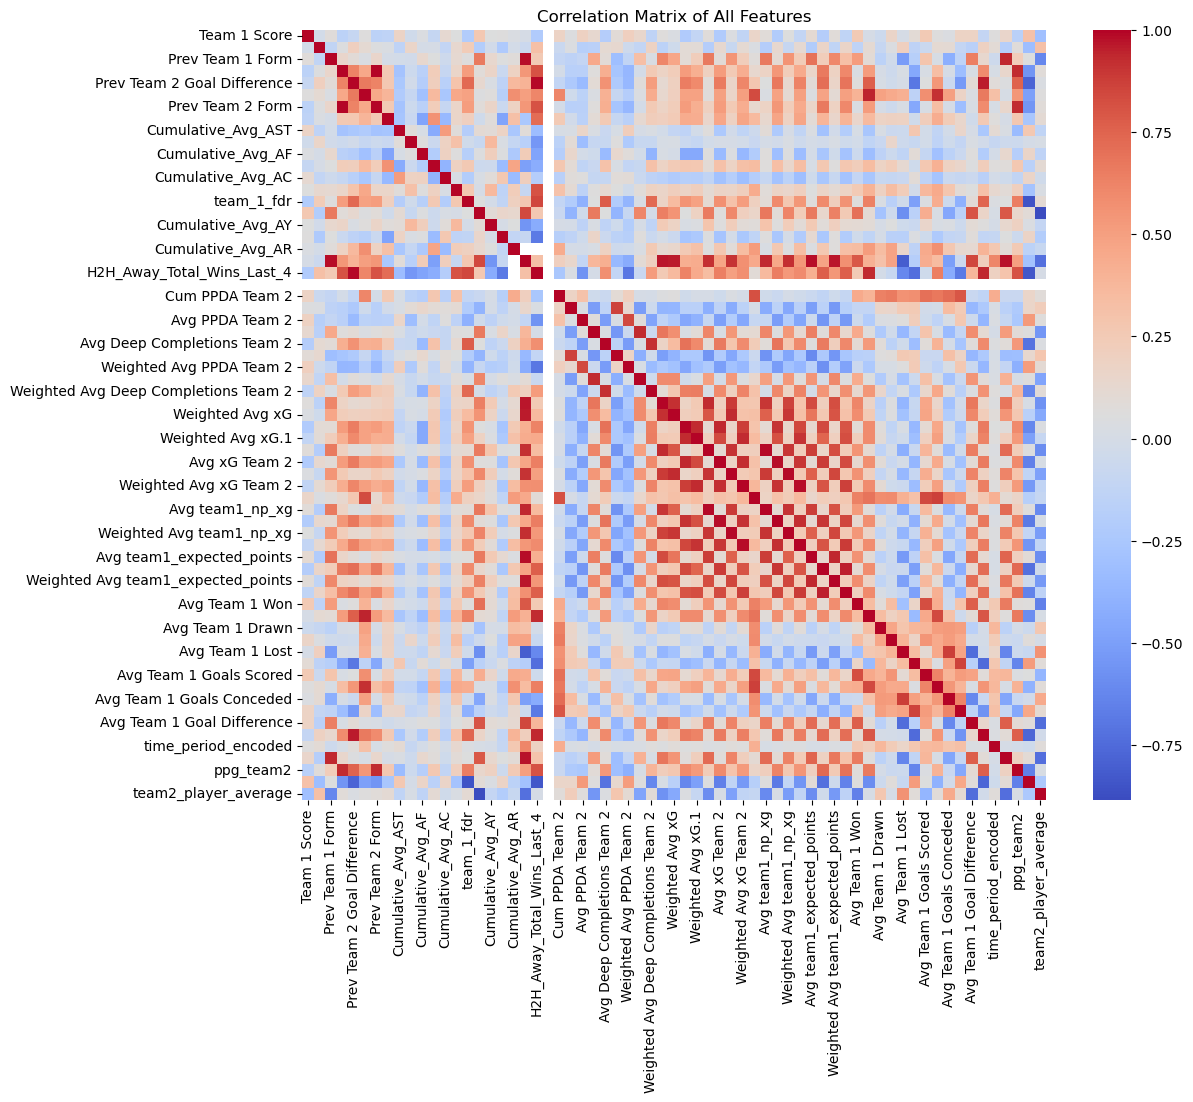

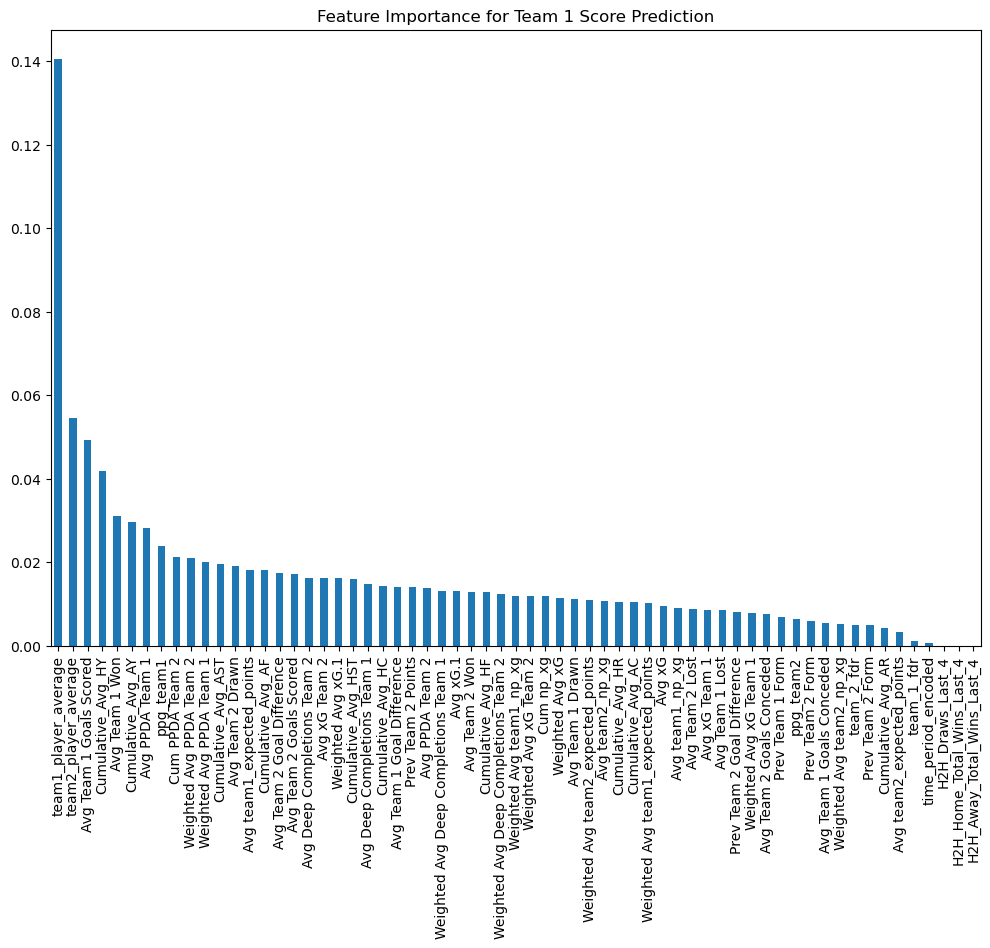

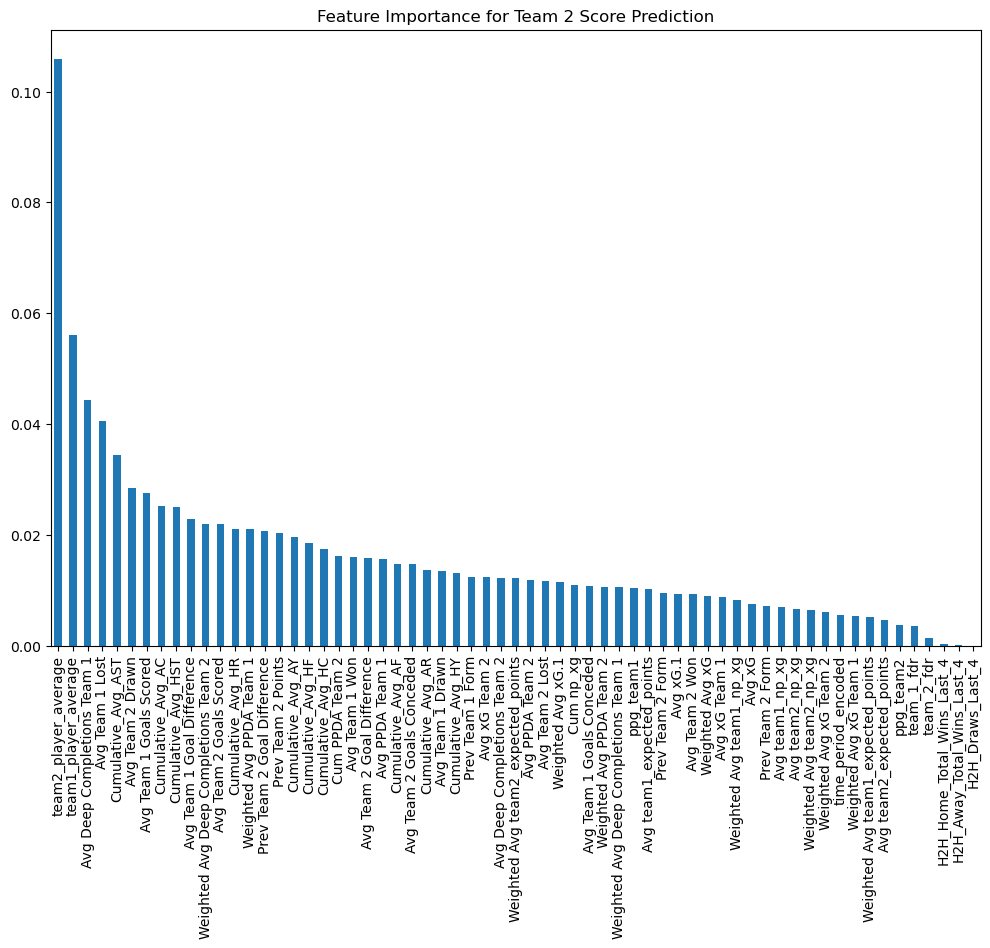

,Team 1 Score,Team 2 Score
Team 1 Score,1.000000,-0.018172
team1_player_average,0.315312,-0.324266
team_2_fdr,0.270306,-0.199800
Avg Team 1 Won,0.254307,-0.140029
Avg Team 1 Goals Scored,0.252736,-0.073010
...,...,...
Avg xG.1,-0.215049,0.101889
Avg xG Team 2,-0.217523,0.128109
H2H_Away_Total_Wins_Last_4,-0.219265,0.318073
team2_player_average,-0.302912,0.317006


In [296]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

#Dropping the first column which is likely just an index or ID
data_cleaned = df

# Calculate correlation matrix
correlation_matrix = data_cleaned.corr()

# Plotting correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix of All Features')
plt.show()

# Selecting the target variables for correlation focus
correlation_with_target = correlation_matrix[['Team 1 Score', 'Team 2 Score']].sort_values(by='Team 1 Score', ascending=False)

# Prepare data for a Random Forest model to get feature importance
X = data_cleaned.drop(['Team 1 Score', 'Team 2 Score'], axis=1)
y_team1 = data_cleaned['Team 1 Score']
y_team2 = data_cleaned['Team 2 Score']

# Fit Random Forest for Team 1
rf_team1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_team1.fit(X, y_team1)
feature_importance_team1 = pd.Series(rf_team1.feature_importances_, index=X.columns)

# Fit Random Forest for Team 2
rf_team2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_team2.fit(X, y_team2)
feature_importance_team2 = pd.Series(rf_team2.feature_importances_, index=X.columns)

# Plotting feature importance
plt.figure(figsize=(12, 8))
feature_importance_team1.sort_values(ascending=False).plot(kind='bar', title='Feature Importance for Team 1 Score Prediction')
plt.show()

plt.figure(figsize=(12, 8))
feature_importance_team2.sort_values(ascending=False).plot(kind='bar', title='Feature Importance for Team 2 Score Prediction')
plt.show()

correlation_with_target


In [297]:
import pandas as pd

# Load your data
data_path = 'modelling_table.csv'  # Update your path accordingly
data = pd.read_csv(data_path)

# Calculate correlation matrix
correlation_matrix = data.corr()

# Focus on correlations with 'Team 1 Score' and 'Team 2 Score'
team1_score_corr = correlation_matrix['Team 1 Score'].sort_values(ascending=False)
team2_score_corr = correlation_matrix['Team 2 Score'].sort_values(ascending=False)

# Print correlations with 'Team 1 Score'
print("Correlations with 'Team 1 Score':")
print(team1_score_corr)

# Print correlations with 'Team 2 Score'
print("\nCorrelations with 'Team 2 Score':")
print(team2_score_corr)


Correlations with 'Team 1 Score':
Team 1 Score                  1.000000
team1_player_average          0.315312
team_2_fdr                    0.270306
Avg Team 1 Won                0.254307
Avg Team 1 Goals Scored       0.252736
                                ...   
Avg xG.1                     -0.215049
Avg xG Team 2                -0.217523
H2H_Away_Total_Wins_Last_4   -0.219265
team2_player_average         -0.302912
H2H_Draws_Last_4                   NaN
Name: Team 1 Score, Length: 66, dtype: float64

Correlations with 'Team 2 Score':
Team 2 Score                   1.000000
H2H_Away_Total_Wins_Last_4     0.318073
team2_player_average           0.317006
team_1_fdr                     0.235531
Prev Team 2 Goal Difference    0.209032
                                 ...   
team_2_fdr                    -0.199800
Avg team1_expected_points     -0.212265
Cumulative_Avg_HR             -0.222041
team1_player_average          -0.324266
H2H_Draws_Last_4                    NaN
Name: Team 2 Sc

## Train models

## Grid Search CV

In [300]:
# from sklearn.model_selection import GridSearchCV

# # Setting up parameter grids for both models
# rf_param_grid = {
#     'n_estimators': [100, 200],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5]
# }

# gb_param_grid = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.1, 0.05],
#     'max_depth': [3, 5]
# }

# # Initialize GridSearchCV for Random Forest and Gradient Boosting for Team 1
# grid_search_rf_team1 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error')
# grid_search_gb_team1 = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, cv=3, scoring='neg_mean_squared_error')

# # Fit the grid search models for Team 1
# grid_search_rf_team1.fit(X_train, y_train_team1)
# grid_search_gb_team1.fit(X_train, y_train_team1)

# # Getting the best estimator parameters and their corresponding RMSE for Team 1
# best_rf_team1 = grid_search_rf_team1.best_estimator_
# best_gb_team1 = grid_search_gb_team1.best_estimator_
# best_rf_rmse_team1 = -grid_search_rf_team1.best_score_ ** 0.5
# best_gb_rmse_team1 = -grid_search_gb_team1.best_score_ ** 0.5

# # Repeat the process for Team 2
# grid_search_rf_team2 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error')
# grid_search_gb_team2 = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid, cv=3, scoring='neg_mean_squared_error')

# # Fit the grid search models for Team 2
# grid_search_rf_team2.fit(X_train, y_train_team2)
# grid_search_gb_team2.fit(X_train, y_train_team2)

# # Getting the best estimator parameters and their corresponding RMSE for Team 2
# best_rf_team2 = grid_search_rf_team2.best_estimator_
# best_gb_team2 = grid_search_gb_team2.best_estimator_
# best_rf_rmse_team2 = -grid_search_rf_team2.best_score_ ** 0.5
# best_gb_rmse_team2 = -grid_search_gb_team2.best_score_ ** 0.5

# (best_rf_team1, best_gb_team1, best_rf_rmse_team1, best_gb_rmse_team1), (best_rf_team2, best_gb_team2, best_rf_rmse_team2, best_gb_rmse_team2)


Best Configurations for Team 1:
Random Forest: max_depth=10, max_features='sqrt'
Gradient Boosting: learning_rate=0.05



Best Configurations for Team 2:
Random Forest: max_features='sqrt', min_samples_split=5
Gradient Boosting: default parameters used in grid search


In [302]:
# # Adjusting parameter grids for both models with broader ranges
# rf_param_grid_adjusted = {
#     'n_estimators': [50, 100, 200],
#     'max_features': ['sqrt', 0.5],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# gb_param_grid_adjusted = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.1, 0.05, 0.01],
#     'max_depth': [3, 5, 7]
# }

# # Re-initialize GridSearchCV with adjusted parameter grids for both models
# grid_search_rf_team1_adjusted = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid_adjusted, cv=3, scoring='neg_mean_squared_error')
# grid_search_gb_team1_adjusted = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid_adjusted, cv=3, scoring='neg_mean_squared_error')

# # Re-fit the grid search models for Team 1
# grid_search_rf_team1_adjusted.fit(X_train, y_train_team1)
# grid_search_gb_team1_adjusted.fit(X_train, y_train_team1)

# # Getting the best estimator parameters and their corresponding RMSE for Team 1
# best_rf_team1_adjusted = grid_search_rf_team1_adjusted.best_estimator_
# best_gb_team1_adjusted = grid_search_gb_team1_adjusted.best_estimator_
# best_rf_rmse_team1_adjusted = -grid_search_rf_team1_adjusted.best_score_ ** 0.5
# best_gb_rmse_team1_adjusted = -grid_search_gb_team1_adjusted.best_score_ ** 0.5

# # Repeat the adjusted process for Team 2
# grid_search_rf_team2_adjusted = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid_adjusted, cv=3, scoring='neg_mean_squared_error')
# grid_search_gb_team2_adjusted = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gb_param_grid_adjusted, cv=3, scoring='neg_mean_squared_error')

# # Re-fit the grid search models for Team 2
# grid_search_rf_team2_adjusted.fit(X_train, y_train_team2)
# grid_search_gb_team2_adjusted.fit(X_train, y_train_team2)

# # Getting the best estimator parameters and their corresponding RMSE for Team 2
# best_rf_team2_adjusted = grid_search_rf_team2_adjusted.best_estimator_
# best_gb_team2_adjusted = grid_search_gb_team2_adjusted.best_estimator_
# best_rf_rmse_team2_adjusted = -grid_search_rf_team2_adjusted.best_score_ ** 0.5
# best_gb_rmse_team2_adjusted = -grid_search_gb_team2_adjusted.best_score_ ** 0.5

# ((best_rf_team1_adjusted, best_gb_team1_adjusted, best_rf_rmse_team1_adjusted, best_gb_rmse_team1_adjusted),
#  (best_rf_team2_adjusted, best_gb_team2_adjusted, best_rf_rmse_team2_adjusted, best_gb_rmse_team2_adjusted))


Result
((RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=3,
                        min_samples_split=5, n_estimators=150, random_state=42),
  GradientBoostingRegressor(learning_rate=0.05, random_state=42),
  1.1781631869935918,
  1.224015556875125),
 (RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=3,
                        min_samples_split=5, random_state=42),
  GradientBoostingRegressor(learning_rate=0.05, random_state=42),
  1.2589750427168531,
  1.3489450632220956))

Random Forest seems to be consistently performing better than Gradient Boosting for both teams in terms of RMSE, indicating better handling of the dataset's features and noise.
The choice of parameters, particularly the depth and the number of estimators for the Random Forest, suggests a balance between model complexity and overfitting.

#### Random Forest

In [306]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Load your data
data_path = 'modelling_table.csv'  # Update your path accordingly
data = pd.read_csv(data_path)

# Prepare data for training
X = data.drop(['Team 1 Score', 'Team 2 Score'], axis=1)  # Exclude target variables from features
y_team1 = data['Team 1 Score']
y_team2 = data['Team 2 Score']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize RandomForest models for both teams
rf_team1 = RandomForestRegressor(max_depth=5, max_features='sqrt', random_state=42)
rf_team2 = RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=42)

# Define cross-validation procedure
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Perform cross-validation predictions for both teams
y_pred_rf_team1 = cross_val_predict(rf_team1, X_scaled, y_team1, cv=cv, n_jobs=-1)
y_pred_rf_team2 = cross_val_predict(rf_team2, X_scaled, y_team2, cv=cv, n_jobs=-1)

# Calculate performance metrics for Team 1
r2_rf_team1 = r2_score(y_team1, y_pred_rf_team1)
mse_rf_team1 = mean_squared_error(y_team1, y_pred_rf_team1)
mae_rf_team1 = mean_absolute_error(y_team1, y_pred_rf_team1)

# Calculate performance metrics for Team 2
r2_rf_team2 = r2_score(y_team2, y_pred_rf_team2)
mse_rf_team2 = mean_squared_error(y_team2, y_pred_rf_team2)
mae_rf_team2 = mean_absolute_error(y_team2, y_pred_rf_team2)

# Print the metrics to evaluate model performance
print("Team 1 - Random Forest: R^2 =", r2_rf_team1, ", MSE =", mse_rf_team1, ", MAE =", mae_rf_team1)
print("Team 2 - Random Forest: R^2 =", r2_rf_team2, ", MSE =", mse_rf_team2, ", MAE =", mae_rf_team2)


Team 1 - Random Forest: R^2 = 0.061636489308438236 , MSE = 1.377652261491478 , MAE = 0.983321868726342
Team 2 - Random Forest: R^2 = 0.026823014601464856 , MSE = 1.3389053685556573 , MAE = 0.8839943599501985


In [307]:
import pandas as pd
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Load the dataset
data_path = 'modelling_table.csv'  # Update your file path accordingly
data = pd.read_csv(data_path)

# Prepare the dataset
# Assume 'Match Result' is the ordinal target variable (0 = lose, 1 = draw, 2 = win)
# Create an example ordinal target column (you would replace this with the actual match results in your data)
data['Match Result'] = data['Team 1 Score'] - data['Team 2 Score']
data['Match Result'] = pd.cut(
    data['Match Result'],
    bins=[-float('inf'), -1, 0, float('inf')],
    labels=[0, 1, 2]  # 0 = lose, 1 = draw, 2 = win
).astype(int)

# Define features (independent variables)
X = data[['Prev Team 1 Form', 'Prev Team 2 Form', 'team_1_fdr', 'team_2_fdr', 'ppg_team1', 'ppg_team2']]
y = data['Match Result']

# Fit the Ordered Probit model
model = OrderedModel(y, X, distr='probit')
result = model.fit(method='bfgs')

# Display the summary of the model
print(result.summary())

# Predict probabilities for each class (0, 1, 2)
predicted_probs = result.predict()
print("Predicted Probabilities:\n", predicted_probs)

# Convert probabilities to a DataFrame for easier interpretation
predicted_probs_df = pd.DataFrame(predicted_probs, columns=['Lose', 'Draw', 'Win'])

# Assign the most likely category as the prediction
predicted_classes = np.argmax(predicted_probs, axis=1)
print("Predicted Classes:\n", predicted_classes)

Optimization terminated successfully.
         Current function value: 0.931307
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
                             OrderedModel Results                             
Dep. Variable:           Match Result   Log-Likelihood:                -129.45
Model:                   OrderedModel   AIC:                             274.9
Method:            Maximum Likelihood   BIC:                             298.4
Date:                Thu, 26 Dec 2024                                         
Time:                        21:14:56                                         
No. Observations:                 139                                         
Df Residuals:                     131                                         
Df Model:                           6                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------